# Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the dataset have?

In [5]:
import pandas as pd

df1=pd.read_excel('flight_price.xlsx')
df1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
df1.shape

(10683, 11)

### Therefore, there are 10683 rows and 11 columns.

# Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the distribution.

In [7]:
import matplotlib.pyplot as plt

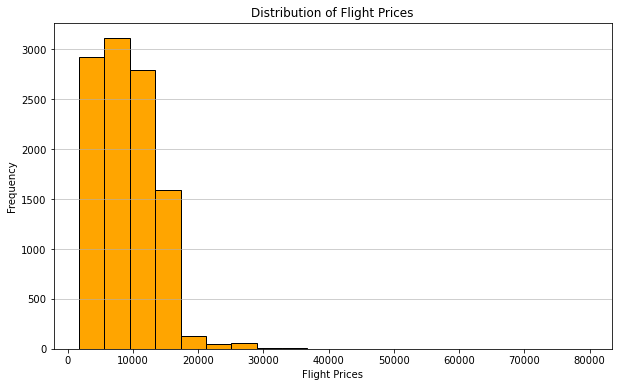

In [8]:
plt.figure(figsize=(10,6))
plt.hist(df1.Price, color='orange', edgecolor='black',bins=20)
plt.xlabel('Flight Prices')
plt.ylabel('Frequency')
plt.title('Distribution of Flight Prices')
plt.grid(axis='y', alpha=0.75)

# Q3. What is the range of prices in the dataset? What is the minimum and maximum price?

In [9]:
df1['Price'].describe()

count    10683.000000
mean      9087.064121
std       4611.359167
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64

In [10]:

flight_prices = df1['Price']

# Calculate the minimum and maximum prices
min_price = flight_prices.min()
max_price = flight_prices.max()

# Calculate the price range
price_range = max_price - min_price

print(f"Minimum Price: {min_price}")
print(f"Maximum Price: {max_price}")
print(f"Price Range: {price_range}")


Minimum Price: 1759
Maximum Price: 79512
Price Range: 77753


# Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different airlines.

In [11]:
df1['Airline'].describe()

count           10683
unique             12
top       Jet Airways
freq             3849
Name: Airline, dtype: object

In [12]:
df1.groupby(by='Airline').describe()

Price                              \
                                    count          mean           std   
Airline                                                                 
Air Asia                            319.0   5590.260188   2027.362290   
Air India                          1752.0   9611.210616   3900.952942   
GoAir                               194.0   5861.056701   2703.585767   
IndiGo                             2053.0   5673.682903   2264.142168   
Jet Airways                        3849.0  11643.923357   4258.940578   
Jet Airways Business                  6.0  58358.666667  11667.596748   
Multiple carriers                  1196.0  10902.678094   3721.234997   
Multiple carriers Premium economy    13.0  11418.846154   1717.153936   
SpiceJet                            818.0   4338.284841   1849.922514   
Trujet                                1.0   4140.000000           NaN   
Vistara                             479.0   7796.348643   2914.298578   
Vistara Premium economy               3.0   8962.333333   2915.405518   

                                                                        \
                                       min      25%      50%       75%   
Airline                                                                  
Air Asia                            3383.0   4282.0   5162.0   6451.00   
Air India                           2050.0   6896.0   9443.0  12219.00   
GoAir                               3398.0   3898.0   5135.0   6811.25   
IndiGo                              2227.0   4226.0   5000.0   6494.00   
Jet Airways                         1840.0   9134.0  11467.0  14151.00   
Jet Airways Business               46490.0  52243.0  54747.0  61122.50   
Multiple carriers                   5797.0   7723.0  10197.0  13587.00   
Multiple carriers Premium economy   9845.0  10161.0  11269.0  11269.00   
SpiceJet                            1759.0   3574.5   3873.0   4760.00   
Trujet                              4140.0   4140.0   4140.0   4140.00   
Vistara                             3687.0   5403.0   7980.0   9345.00   
Vistara Premium economy             5969.0   7547.0   9125.0  10459.00   

                                            
                                       max  
Airline                                     
Air Asia                           13774.0  
Air India                          31945.0  
GoAir                              22794.0  
IndiGo                             22153.0  
Jet Airways                        54826.0  
Jet Airways Business               79512.0  
Multiple carriers                  36983.0  
Multiple carriers Premium economy  14629.0  
SpiceJet                           23267.0  
Trujet                              4140.0  
Vistara                            21730.0  
Vistara Premium economy            11793.0

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

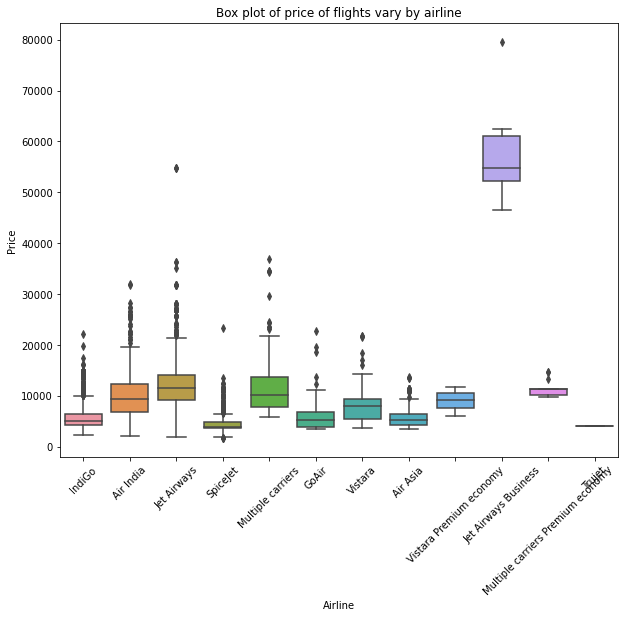

In [14]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df1,x='Airline',y='Price')
plt.title('Box plot of price of flights vary by airline')
plt.xticks(rotation=45)
plt.show()

# Q5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how they may impact your analysis.

In [15]:
df1['Price'].describe().round()

count    10683.0
mean      9087.0
std       4611.0
min       1759.0
25%       5277.0
50%       8372.0
75%      12373.0
max      79512.0
Name: Price, dtype: float64

In [16]:
q1=5277
q3=12373
min=1759
max=79512
iqr=q3-q1

In [17]:
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print(f"lower bound:{lower_bound}")
print(f"upper bound:{upper_bound}")

lower bound:-5367.0
upper bound:23017.0


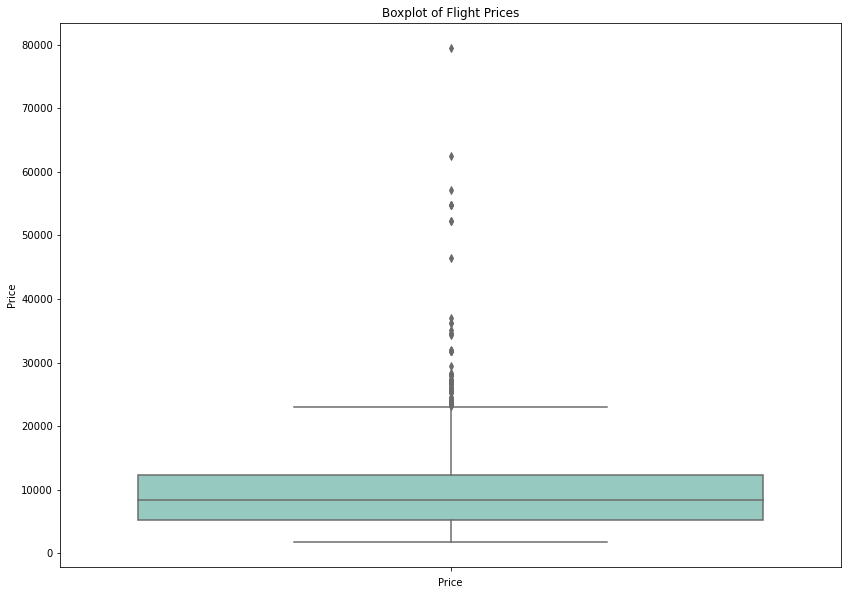

In [18]:
plt.figure(figsize=(14, 10))
sns.boxplot(y='Price', data=df1, palette='Set3')
plt.xlabel('Price')
plt.title('Boxplot of Flight Prices')

plt.show()

In [19]:
df1[df1.Price > q3 + 1.5*iqr]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
123,Air India,1/03/2019,Delhi,Cochin,DEL → BOM → COK,23:00,19:15 02 Mar,20h 15m,1 stop,No info,27430
396,Multiple carriers,1/03/2019,Delhi,Cochin,DEL → BOM → COK,12:50,19:15,6h 25m,1 stop,No info,36983
486,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,15:15,6h 20m,1 stop,No info,26890
510,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,07:00,12:25,5h 25m,1 stop,No info,26890
597,Air India,6/03/2019,Mumbai,Hyderabad,BOM → JDH → DEL → HYD,09:40,15:15 07 Mar,29h 35m,2 stops,No info,25139
...,...,...,...,...,...,...,...,...,...,...,...
10353,Jet Airways,6/03/2019,Mumbai,Hyderabad,BOM → BDQ → DEL → HYD,19:50,16:50 07 Mar,21h,2 stops,No info,24210
10364,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → MAA → DEL,09:45,14:25,4h 40m,1 stop,Business class,57209
10383,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,07:00,05:05 02 Mar,22h 5m,1 stop,No info,26890
10439,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:40,09:00 02 Mar,14h 20m,1 stop,No info,31825


### No. of outliers= 94

# Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset to identify the peak travel season. What features would you analyze to identify the peak season, and how would you present your findings to your boss?

### To identify the peak travel season using the Flight Price dataset, there are several features that could be analyzed. Here are some potential features:
1. Month of the year: Analyzing the average flight prices for each month can reveal any seasonal patterns in travel demand. This analysis can help to identify the months with the highest and lowest flight prices.

2. Day of the week: Analyzing the average flight prices for each day of the week can reveal any patterns in travel demand based on the day of the week. This analysis can help to identify the days with the highest and lowest flight prices.

3. Destination: Analyzing the average flight prices for each destination can reveal any seasonal patterns in travel demand for specific locations. This analysis can help to identify the destinations with the highest and lowest flight prices.

4. Departure city: Analyzing the average flight prices for each departure city can reveal any seasonal patterns in travel demand for specific locations. This analysis can help to identify the departure cities with the highest and lowest flight prices.


In [20]:
df1['Date_of_Journey']=pd.to_datetime(df1['Date_of_Journey'])

In [21]:
df1['Month']=df1['Date_of_Journey'].dt.month
df1['Date']=df1['Date_of_Journey'].dt.day
df1['Year']=df1['Date_of_Journey'].dt.year
df1['Day']=df1['Date_of_Journey'].dt.day_name()

In [22]:
df1.groupby(by='Month').Month.count()

Month
1     1075
3     2211
4      424
5     2074
6     2536
9     1406
12     957
Name: Month, dtype: int64

<AxesSubplot:xlabel='Month'>

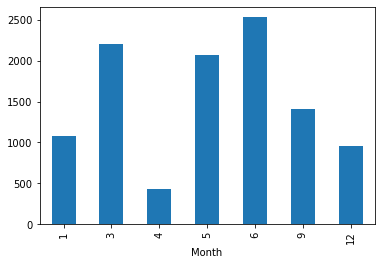

In [23]:
df1.groupby(by='Month').Month.count().plot(kind='bar')

### Peak months of journey 5 th and 6 th

In [24]:
df1.groupby(by='Month').Price.mean().round()

Month
1     10493.0
3      8434.0
4      5231.0
5      9361.0
6      9215.0
9      9551.0
12     9111.0
Name: Price, dtype: float64

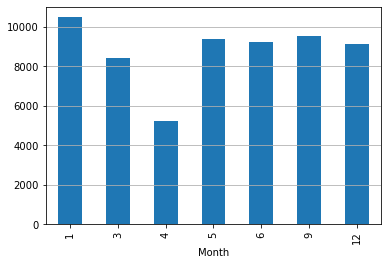

In [25]:
df1.groupby(by='Month').Price.mean().round().plot(kind='bar').grid(axis='y')

In [26]:
df1.groupby(by='Month').mean()['Price'].sort_values()

Month
4      5230.860849
3      8433.839891
12     9110.774295
6      9214.964905
5      9361.077628
9      9551.474395
1     10492.642791
Name: Price, dtype: float64

<AxesSubplot:xlabel='Month'>

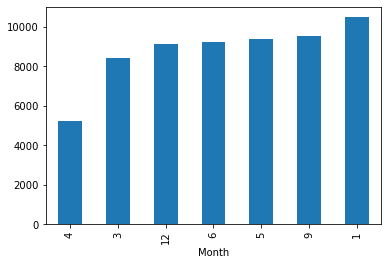

In [27]:
df1.groupby(by='Month').mean()['Price'].sort_values().plot(kind='bar')

In [28]:
df1.groupby(by='Destination').Destination.count().sort_values()

Destination
Kolkata       381
Hyderabad     697
New Delhi     932
Delhi        1265
Banglore     2871
Cochin       4537
Name: Destination, dtype: int64

<AxesSubplot:xlabel='Destination'>

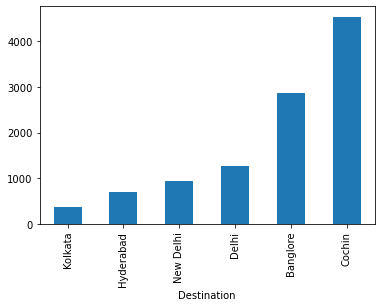

In [29]:
df1.groupby(by='Destination').Destination.count().sort_values().plot(kind='bar')

In [30]:
df1.groupby(by='Source').mean()['Price'].sort_values()

Source
Chennai      4789.892388
Mumbai       5059.708752
Banglore     8017.464269
Kolkata      9158.389411
Delhi       10539.439057
Name: Price, dtype: float64

<AxesSubplot:xlabel='Source'>

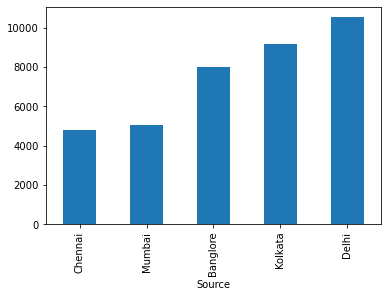

In [31]:
df1.groupby(by='Source').mean()['Price'].sort_values().plot(kind='bar')

# Findings:
1. Most destined city- Banglore, cochin
2. most travelled months with max price - 1 & 9
3. most travelled months - 5 & 6
4. most travelled from - delhi

# Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight Price dataset to identify any trends in flight prices. What features would you analyze to identify these trends, and what visualizations would you use to present your findings to your team?

### To uncover trends in flight prices, I would initiate my analysis by examining the following aspects within the Flight Price dataset:

Temporal Features: These encompass elements such as the booking date, travel date, and the time of day for travel. By scrutinizing these attributes, we can discern whether flight prices exhibit patterns associated with specific times of the year or particular hours of the day.

Route Characteristics: This category includes information about the departure and arrival cities, as well as any layovers or stopovers during the journey. Analyzing these aspects enables us to determine whether flight prices vary significantly based on the chosen route or the inclusion of specific stopovers.

Airline Attributes: This pertains to the airline carrier responsible for each flight. Examining these attributes allows us to identify whether particular airlines consistently offer higher or lower prices compared to others.

Demand-Related Factors: This covers variables such as the number of passengers booked on a flight and the total number of available seats. By delving into these factors, we can ascertain whether flight prices tend to rise or fall in response to fluctuations in demand.

### As a data analyst for a flight booking website, I would focus on several key features to identify trends in flight prices. To present my findings to the team, I would utilize various types of visualizations:

Line Charts: These charts would effectively display how flight prices change over time, such as daily, weekly, or monthly fluctuations. They can also illustrate how prices vary depending on the time of day.

Scatterplots: I would employ scatterplots to visualize the relationship between flight prices and relevant variables like the number of passengers or seat availability. This would help us understand if there are any correlations or dependencies.

Bar Charts: Bar charts would be useful for comparing flight prices across different airlines or routes. This type of visualization can highlight which airlines or routes tend to have higher or lower prices.

Heatmaps: To identify seasonal patterns, I would use heatmaps to show when flight prices tend to be higher or lower throughout the year for various routes. This can assist in understanding the seasonality of flight prices.

In summary, my analysis would involve examining these specific features and using appropriate visualizations to convey the insights effectively. The goal is to uncover any discernible patterns or trends in flight prices, which can then inform pricing strategies and enhance customer service for the flight booking website.


# Q8. You are a data scientist working for an airline company, and you have been asked to analyze the Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to identify these factors, and how would you present your findings to the management team?

### To identify the factors that affect flight prices in the Flight Price dataset as a data scientist working for an airline company, I would focus on several key features and use appropriate analytical techniques. Here's a breakdown of the features I would analyze and how I would present my findings to the management team:

1. Route Information:

Origin and Destination Cities: Analyze how flight prices vary based on the cities passengers are traveling between.

Number of Stops: Investigate whether non-stop flights are priced differently from those with layovers or stopovers.

2. Temporal Features:

Booking Date: Explore if the date when tickets are booked affects prices.

Travel Date: Examine whether the time of year, month, or day of the week influences flight prices.

Time of Day: Investigate if flight prices differ depending on the time of the day (e.g., morning, afternoon, evening).

3. Airline-Related Features:

Airline Carrier: Analyze whether different airlines have varying pricing strategies and how this impacts ticket costs.

Class of Service: Assess if prices differ for economy, business, or first-class seats.

4. Demand and Capacity:

Number of Passengers: Determine if the number of passengers booked on a flight affects pricing.

Seat Availability: Analyze whether ticket prices fluctuate based on the number of available seats on a flight.

5. Additional Factors:

Seasonality: Investigate how seasonal factors like holidays and peak travel seasons impact flight prices.

Economic Indicators: Explore whether economic conditions affect ticket pricing.

### To present my findings to the management team, I would use a combination of descriptive statistics, data visualizations, and potentially regression analysis or machine learning models (e.g., linear regression, random forests) to quantify and explain the impact of these factors on flight prices. Here's how I would structure the presentation:

1. Executive Summary: Provide a high-level overview of the key findings and their implications for pricing strategies.

2. Data Exploration: Present summary statistics, distributions, and visualizations for each relevant feature to give an initial understanding of the data.

3. Factors Affecting Flight Prices:
Show the impact of route information, temporal features, airline carriers, and demand-related factors on flight prices through charts and graphs.
4. Use regression analysis to quantify the relationship between these factors and flight prices.
5. Seasonal Patterns: Highlight any seasonal trends that affect flight prices and explain how the airline can adjust pricing accordingly.

6. Recommendations: Based on the analysis, offer recommendations for pricing strategies, such as adjusting prices for certain routes, days of the week, or during peak travel times.

7. Future Analysis: Suggest further analysis or data collection that can provide more insights into price determination.

In this way, the management team will receive a comprehensive overview of the factors influencing flight prices and actionable insights for optimizing pricing strategies in the airline industry.

# Q9. Load the Google Playstore dataset and examine its dimensions. How many rows and columns does the dataset have?

In [32]:
df2=pd.read_csv('googleplaystore.csv')
df2.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [33]:
df2.shape

(10841, 13)

### no. of rows=10841
### no. of columns=13

# Q10. How does the rating of apps vary by category? Create a boxplot to compare the ratings of different app categories.

In [34]:
df2.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [35]:
df2.groupby(by='Category').describe()

Rating                                                   \
                      count       mean       std   min     25%   50%     75%   
Category                                                                       
1.9                     1.0  19.000000       NaN  19.0  19.000  19.0  19.000   
ART_AND_DESIGN         62.0   4.358065  0.358297   3.2   4.100   4.4   4.700   
AUTO_AND_VEHICLES      73.0   4.190411  0.543692   2.1   4.000   4.3   4.600   
BEAUTY                 42.0   4.278571  0.362603   3.1   4.000   4.3   4.575   
BOOKS_AND_REFERENCE   178.0   4.346067  0.429046   2.7   4.100   4.5   4.600   
BUSINESS              303.0   4.121452  0.624422   1.0   3.900   4.3   4.500   
COMICS                 58.0   4.155172  0.537758   2.8   3.825   4.4   4.500   
COMMUNICATION         328.0   4.158537  0.426192   1.0   4.000   4.3   4.400   
DATING                195.0   3.970769  0.630510   1.0   3.700   4.1   4.400   
EDUCATION             155.0   4.389032  0.251894   3.5   4.200   4.4   4.600   
ENTERTAINMENT         149.0   4.126174  0.302556   3.0   3.900   4.2   4.300   
EVENTS                 45.0   4.435556  0.419499   2.9   4.200   4.5   4.700   
FAMILY               1747.0   4.192272  0.508026   1.0   4.000   4.3   4.500   
FINANCE               323.0   4.131889  0.642108   1.0   4.000   4.3   4.500   
FOOD_AND_DRINK        109.0   4.166972  0.548070   1.7   4.000   4.3   4.500   
GAME                 1097.0   4.286326  0.365375   1.0   4.100   4.4   4.500   
HEALTH_AND_FITNESS    297.0   4.277104  0.617822   1.4   4.100   4.5   4.600   
HOUSE_AND_HOME         76.0   4.197368  0.368411   2.8   4.000   4.3   4.500   
LIBRARIES_AND_DEMO     65.0   4.178462  0.378522   3.1   4.000   4.2   4.400   
LIFESTYLE             314.0   4.094904  0.693907   1.5   3.800   4.2   4.600   
MAPS_AND_NAVIGATION   124.0   4.051613  0.519926   1.9   3.775   4.2   4.400   
MEDICAL               350.0   4.189143  0.663581   1.0   4.000   4.3   4.600   
NEWS_AND_MAGAZINES    233.0   4.132189  0.536707   1.7   3.900   4.2   4.500   
PARENTING              50.0   4.300000  0.517845   2.0   4.100   4.4   4.675   
PERSONALIZATION       314.0   4.335987  0.352732   2.5   4.200   4.4   4.600   
PHOTOGRAPHY           317.0   4.192114  0.462896   2.0   4.000   4.3   4.500   
PRODUCTIVITY          351.0   4.211396  0.504931   1.0   4.100   4.3   4.500   
SHOPPING              238.0   4.259664  0.404577   1.6   4.100   4.3   4.500   
SOCIAL                259.0   4.255598  0.413809   1.9   4.100   4.3   4.500   
SPORTS                319.0   4.223511  0.427857   1.5   4.100   4.3   4.500   
TOOLS                 734.0   4.047411  0.616143   1.0   3.800   4.2   4.400   
TRAVEL_AND_LOCAL      226.0   4.109292  0.504691   2.2   3.900   4.3   4.400   
VIDEO_PLAYERS         160.0   4.063750  0.551098   1.8   3.800   4.2   4.400   
WEATHER                75.0   4.244000  0.331353   3.3   4.050   4.3   4.500   

                           
                      max  
Category                   
1.9                  19.0  
ART_AND_DESIGN        5.0  
AUTO_AND_VEHICLES     4.9  
BEAUTY                4.9  
BOOKS_AND_REFERENCE   5.0  
BUSINESS              5.0  
COMICS                5.0  
COMMUNICATION         5.0  
DATING                5.0  
EDUCATION             4.9  
ENTERTAINMENT         4.7  
EVENTS                5.0  
FAMILY                5.0  
FINANCE               5.0  
FOOD_AND_DRINK        5.0  
GAME                  5.0  
HEALTH_AND_FITNESS    5.0  
HOUSE_AND_HOME        4.8  
LIBRARIES_AND_DEMO    5.0  
LIFESTYLE             5.0  
MAPS_AND_NAVIGATION   4.9  
MEDICAL               5.0  
NEWS_AND_MAGAZINES    5.0  
PARENTING             5.0  
PERSONALIZATION       5.0  
PHOTOGRAPHY           5.0  
PRODUCTIVITY          5.0  
SHOPPING              5.0  
SOCIAL                5.0  
SPORTS                5.0  
TOOLS                 5.0  
TRAVEL_AND_LOCAL      5.0  
VIDEO_PLAYERS         4.9  
WEATHER               4.8

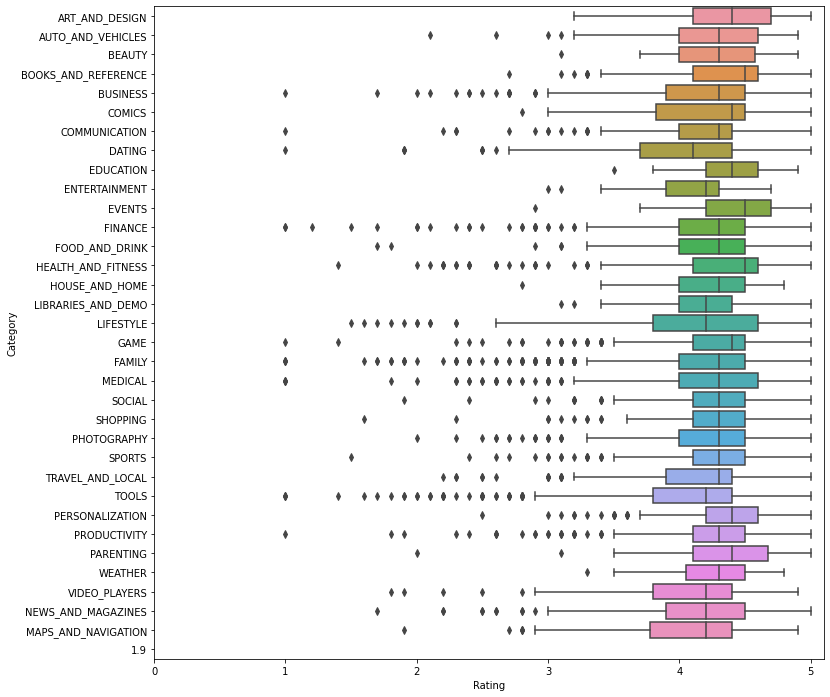

In [36]:
plt.figure(figsize=(12,12))
sns.boxplot(data=df2,y='Category',x='Rating')
plt.xlim([0,5.1])
plt.show()

# Q11. Are there any missing values in the dataset? Identify any missing values and describe how they may impact your analysis.

In [37]:
df2.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

### Insights:

1. 1474 missing values found in Rating
2. 1 Missing Value found in Type
3. 8 Missing Values found in Current Ver
4. 2 Missing Values found in Android Ver

### It causes :-
1. biaseness
2. skewed result
3. distorted results
4. misleading

# Q12. What is the relationship between the size of an app and its rating? Create a scatter plot to visualize the relationship.

In [38]:
import numpy as np
df2['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [60]:
df2['Size']=df2['Size'].str.replace('M','000')
df2['Size']=df2['Size'].str.replace('k','')
df2['Size'] = df2['Size'].replace('Varies with device',np.nan)
df2['Size'] = df2['Size'].replace('1,000+',1)

In [61]:
df2['Size'] = df2['Size'].astype(float)

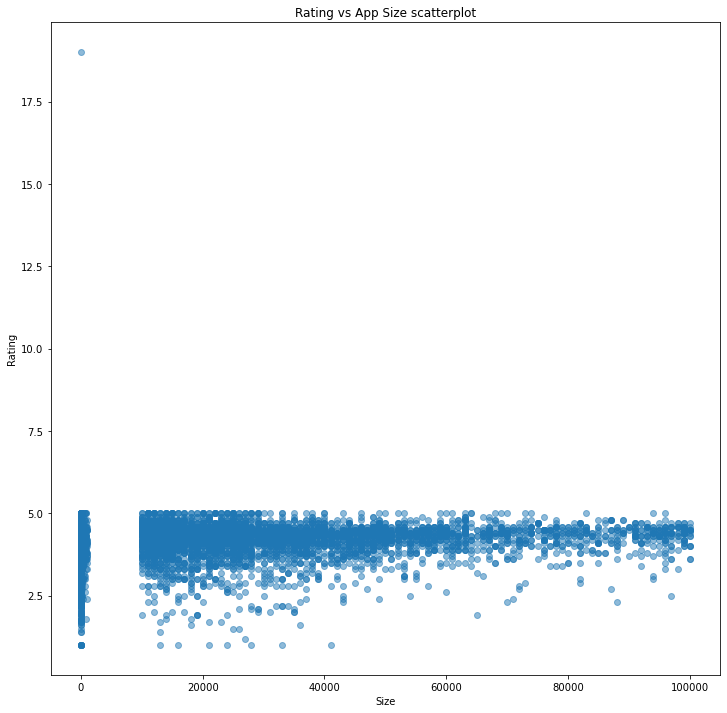

In [64]:
plt.figure(figsize=(12,12))
plt.scatter(data=df2,x='Size',y='Rating',alpha=0.5)
plt.xlabel('Size')
plt.ylabel('Rating')
plt.title('Rating vs App Size scatterplot')
plt.show()

# Q13. How does the type of app affect its price? Create a bar chart to compare average prices by app type.

In [65]:
df2['Price']=df2['Price'].str.replace('$','')

C:\Users\SAMPADA\AppData\Local\Temp/ipykernel_10672/2893456492.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df2['Price']=df2['Price'].str.replace('$','')


In [67]:
df2['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       'Everyone', '1.20', '1.04'], dtype=object)

In [69]:
df2[df2.Price=='Everyone']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,1.0,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [70]:
df2=df2.drop(index=10472,axis=0)

In [72]:
df2['Price'] = df2['Price'].astype(float)

In [73]:
df2.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [74]:
df2.groupby(by='Type').Type.count()

Type
Free    10039
Paid      800
Name: Type, dtype: int64

<AxesSubplot:xlabel='Type'>

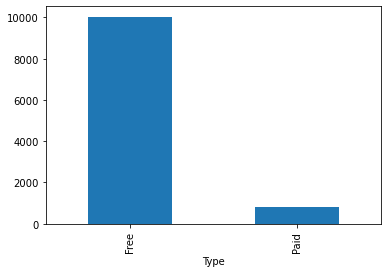

In [77]:
df2.groupby(by='Type').Type.count().plot(kind='bar')

In [80]:
df2.groupby(by='Type').mean()['Price']

Type
Free     0.000000
Paid    13.920837
Name: Price, dtype: float64

<AxesSubplot:xlabel='Type'>

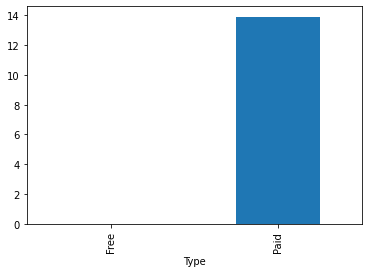

In [79]:
df2.groupby(by='Type').mean()['Price'].plot(kind='bar')

# Q14. What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps with the highest number of installs.

In [84]:
df2['Installs']=df2['Installs'].str.replace('+','')
df2['Installs']=df2['Installs'].str.replace(',','')

C:\Users\SAMPADA\AppData\Local\Temp/ipykernel_10672/3815803166.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df2['Installs']=df2['Installs'].str.replace('+','')


In [85]:
df2['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [87]:
df2['App'].duplicated().sum()

1181

In [88]:
df2=df2.drop_duplicates(subset=['App'],keep='first')

In [89]:
df2['Installs']=df2['Installs'].astype(int)

In [98]:
top_10_apps = df2.sort_values(by=['Installs','Rating'],ascending=False).head(10)[['App','Installs','Rating']]
top_10_apps

,App,Installs,Rating
1654,Subway Surfers,1000000000,4.5
2545,Instagram,1000000000,4.5
2808,Google Photos,1000000000,4.5
336,WhatsApp Messenger,1000000000,4.4
3234,Google,1000000000,4.4
3454,Google Drive,1000000000,4.4
338,Google Chrome: Fast & Secure,1000000000,4.3
340,Gmail,1000000000,4.3
865,Google Play Games,1000000000,4.3
3117,Maps - Navigate & Explore,1000000000,4.3


# Q15. A company wants to launch a new app on the Google Playstore and has asked you to analyze the Google Playstore dataset to identify the most popular app categories. How would you approach this task, and what features would you analyze to make recommendations to the company?

In [99]:
df2['Category'].value_counts()

FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64

<AxesSubplot:title={'center':'Value Count of App Categories'}>

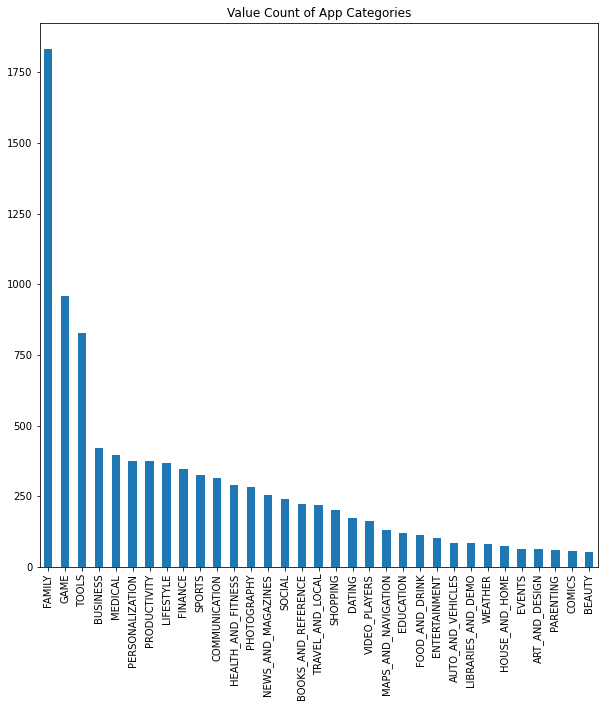

In [100]:
df2['Category'].value_counts().plot(kind='bar',figsize=(10,10),title='Value Count of App Categories')

In [101]:
df2.groupby(by='Category').mean()['Rating'].sort_values(ascending=False)

Category
EVENTS                 4.435556
EDUCATION              4.364407
ART_AND_DESIGN         4.357377
BOOKS_AND_REFERENCE    4.344970
PERSONALIZATION        4.332215
PARENTING              4.300000
BEAUTY                 4.278571
GAME                   4.247368
SOCIAL                 4.247291
WEATHER                4.243056
HEALTH_AND_FITNESS     4.243033
SHOPPING               4.230000
SPORTS                 4.216154
AUTO_AND_VEHICLES      4.190411
PRODUCTIVITY           4.183389
COMICS                 4.181481
FAMILY                 4.179664
LIBRARIES_AND_DEMO     4.178125
FOOD_AND_DRINK         4.172340
MEDICAL                4.166552
PHOTOGRAPHY            4.157414
HOUSE_AND_HOME         4.150000
ENTERTAINMENT          4.135294
NEWS_AND_MAGAZINES     4.121569
COMMUNICATION          4.121484
FINANCE                4.115563
BUSINESS               4.098479
LIFESTYLE              4.093355
TRAVEL_AND_LOCAL       4.069519
VIDEO_PLAYERS          4.044595
TOOLS                  4.039554

<AxesSubplot:title={'center':'Average Review per category'}, xlabel='Category'>

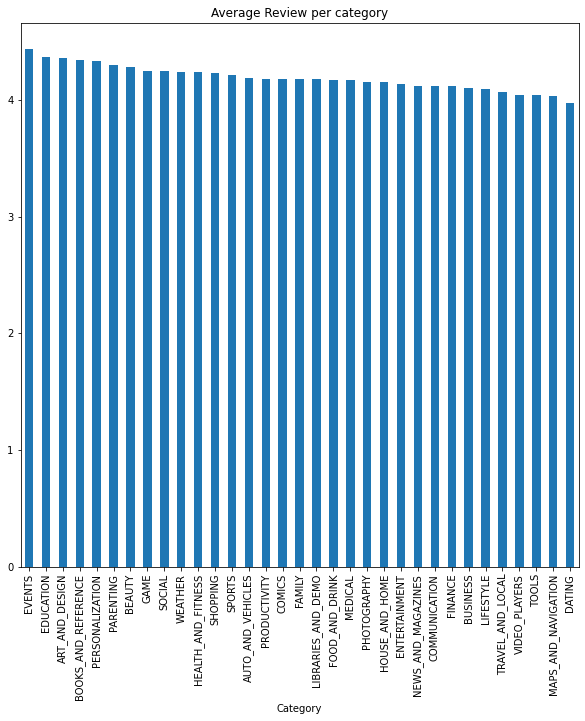

In [106]:
df2.groupby(by='Category').mean()['Rating'].sort_values(ascending=False).plot(kind='bar',
                                                                                  figsize=(10,10),
                                                                                  title = 'Average Review per category')

# Q16. A mobile app development company wants to analyze the Google Playstore dataset to identify the most successful app developers. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

In [109]:
df2.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### To identify the most successful app developers in the Google Play Store, we would need to analyze various features such as:

1. Most downloaded Category
2. Most downloaded genre
3. Avg size of app
4. Average installs per category,genre
5. most ratings,avg ratings

### To present the findings, we could use various data visualizations such as:
Bar charts and pie charts to represent the number of downloads and rating of the apps.

Scatter plots and bubble charts to analyze the correlation between the number of downloads, rating, and price.

Heat maps to analyze the distribution of apps across different categories.

Line graphs to represent the trend in the number of reviews over time.

Tables and charts to compare the performance of different app developers.

Interactive dashboards that allow users to filter and explore the data based on different criteria such as category, price, and rating

# Q17. A marketing research firm wants to analyze the Google Playstore dataset to identify the best time to launch a new app. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

### To identify the best time to launch a new app, we would need to analyze various features such as:
Seasonality: Certain categories of apps may perform better during specific seasons (e.g., fitness apps during the new year or travel apps during the summer).

Monthly trends: Analyzing the number of downloads, rating, and reviews over time could help identify trends in user behavior and preferences.

Day of the week: The day of the week may impact app usage and downloads. For example, weekdays may see higher usage for productivity apps, while weekends may see higher usage for gaming apps.

Competition: Analyzing the number of apps in a particular category and their performance could provide insights into the level of competition in the market.

User demographics: Understanding the demographics of the app's target audience could help identify the best time to launch the app based on their behavior and preferences.

### To present the findings, we could use various data visualizations such as:
Line graphs to represent the trend in the number of downloads, rating, and reviews over time.

Heat maps to analyze the distribution of app downloads by month and day of the week.

Bar charts to represent the performance of competing apps in a particular category.

Scatter plots to analyze the correlation between the number of downloads, rating, and reviews and the time of the year.

Interactive dashboards that allow users to filter and explore the data based on different criteria such as category, user demographics, and time of the year.

Overall, the combination of these features and visualizations could provide valuable insights to the marketing research firm and help them make data-driven decisions about when to launch a new app.